# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [3]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [4]:
df.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q',
       'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q',
       'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',
       'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q',
       'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

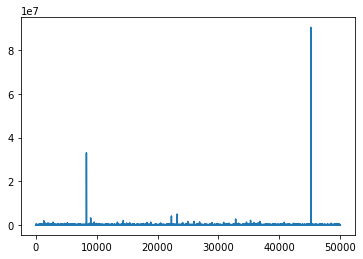

In [5]:
plt.plot(df.income)
#plt.yscale(value='log')
plt.show

#видим, что в income есть "выбросы"

<function matplotlib.pyplot.show(close=None, block=None)>

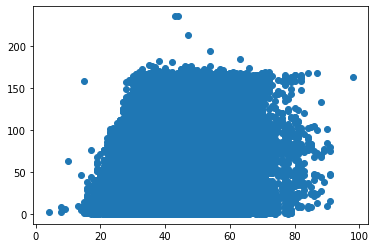

In [6]:
plt.scatter(df.age, df.full_mob)
plt.show

#Длительность взаимоотношений с банком кореллирует с возрастом

        casa_balance_0m
gender                 
F          48214.119930
М          85591.113076


<function matplotlib.pyplot.show(close=None, block=None)>

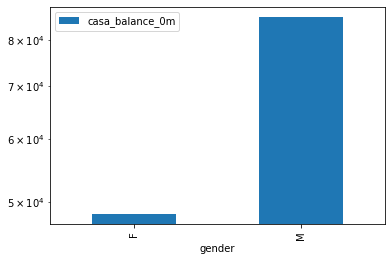

In [7]:
df1 = df[['gender','casa_balance_0m']]
df1.head(5)
d = df1.groupby('gender').mean()
print(d)
d.plot(kind='bar', logy=True)
plt.show

# ср. значение casa_balance_0m у мужчин выше

<function matplotlib.pyplot.show(close=None, block=None)>

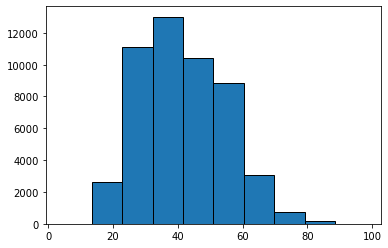

In [68]:
hist_info = plt.hist(df.age, bins=10, edgecolor='black')
plt.show
#определили основные возрастные группы

           dc_trx_cnt
city_type            
100-500    115.002331
1M+        101.952706
500-1000   103.648069
<100        98.010051
Mega       108.865870


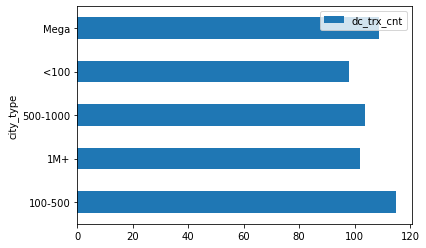

In [8]:
df2 = df[['city_type','dc_trx_cnt']]
df2.head(5)
e = df2.groupby('city_type').mean()
print(e)

e.plot(kind='barh')
plt.show()

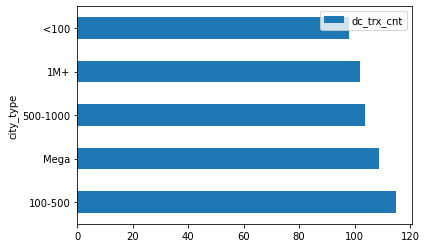

In [9]:
e.sort_values('dc_trx_cnt', ascending=False).plot(kind='barh')
plt.show()
# самое большое среднее количество транзакций в городах с населением 100-500 тыс.чел.

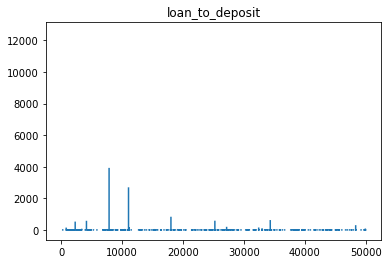

In [10]:
plt.plot(df.loan_to_deposit)
plt.title('loan_to_deposit')
plt.show()

In [11]:
df_copy = df.copy()
cut_bins = [6, 12, 18, 35, 55, 70, 100]
cut_labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged', 'Retired person', 'OLD']
df_copy['Age_cathegory'] = pd.cut(df_copy['age'], bins = cut_bins, labels = cut_labels)

df_copy.head(5)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,Age_cathegory
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,OLD
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952,Middle Aged
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539,Retired person
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556,Middle Aged
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562,OLD


In [12]:
df_copy1 = df_copy[['Age_cathegory','nbi']]
df_copy1['nbi_num'] = pd.to_numeric(df_copy1['nbi'])
df_copy1.head(5)                    

C:\Users\User\AppData\Local\Temp\ipykernel_3328\1068093567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy1['nbi_num'] = pd.to_numeric(df_copy1['nbi'])


,Age_cathegory,nbi,nbi_num
0,OLD,NaN,NaN
1,Middle Aged,28.762952,28.762952
2,Retired person,1973.335539,1973.335539
3,Middle Aged,364.008556,364.008556
4,OLD,6651.416562,6651.416562


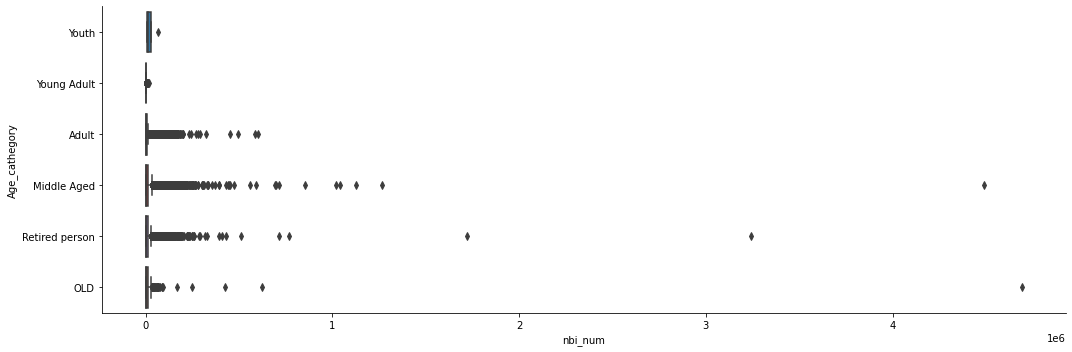

In [13]:
sns.catplot(x='nbi_num', y='Age_cathegory', kind = 'box', aspect=3, data=df_copy1);

In [14]:
f = df_copy1.groupby('Age_cathegory').sum().reset_index()
f

,Age_cathegory,nbi,nbi_num
0,Youth,9.532060e+04,9.532060e+04
1,Young Adult,2.449858e+05,2.449858e+05
2,Adult,1.449055e+08,1.449055e+08
3,Middle Aged,3.217278e+08,3.217278e+08
4,Retired person,9.403037e+07,9.403037e+07
5,OLD,1.238201e+07,1.238201e+07


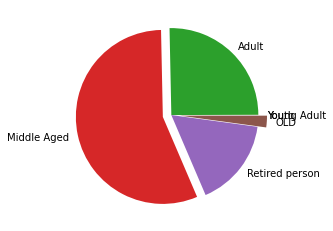

In [15]:
v = f.nbi_num
labels = f.Age_cathegory
explode =[0, 0 , 0, 0.1, 0, 0.1]
plt.pie(v, labels=labels, explode=explode)
plt.show()

#более половины дохода (доход от клиента без OPEX) от Middle Aged

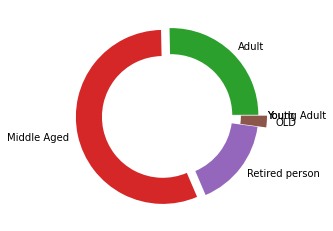

In [16]:
width = 0.3
wedge_pr = {"width": width}
plt.pie(v, labels=labels, explode=explode, wedgeprops=wedge_pr)
plt.show()

In [59]:
df_copy.sample(5)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,Age_cathegory
27936,35,М,Mega,77,0.0,0.0,0.0,0.0,0.00,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.323011,Adult
27531,24,F,Mega,56,0.0,0.0,0.0,0.0,3666.76,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,577.391296,Adult
5284,44,М,1M+,29,0.0,0.0,0.0,0.0,18.52,69,...,0.0,0.0,0.0,0.0,0.0,NaN,545.214058,0.311837,648.247660,Middle Aged
12225,53,F,Mega,4,0.0,0.0,0.0,0.0,49.96,11,...,0.0,0.0,0.0,0.0,0.0,NaN,14927.272727,5.282749,NaN,Middle Aged
13770,66,М,<100,41,0.0,0.0,0.0,0.0,7251.14,358,...,0.0,0.0,0.0,0.0,0.0,NaN,665.896592,0.053559,1118.899124,Retired person


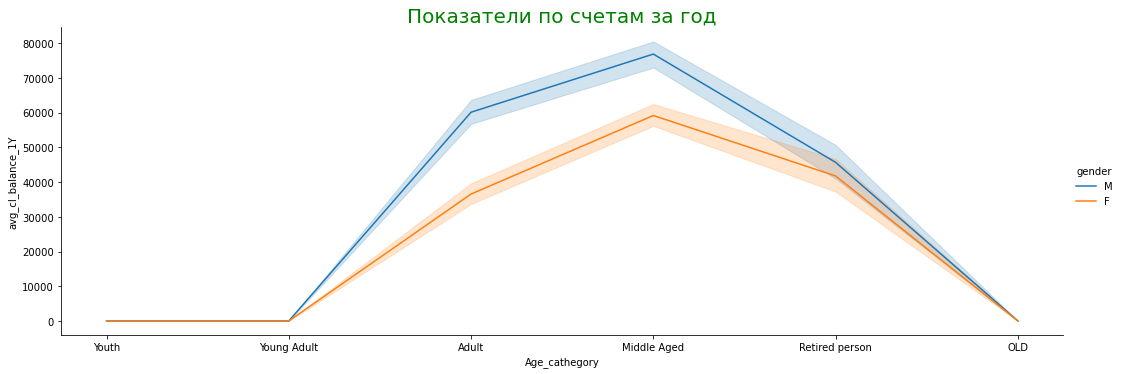

In [22]:
sns.relplot(
    x='Age_cathegory', 
    y='avg_cl_balance_1Y',
    hue='gender',
    data=df_copy, 
    kind='line',
    aspect=3
)
plt.title('Показатели по счетам за год', size=20, color='g');

#наблюдаем зависимость показателей по счетам за год от возрастной категории

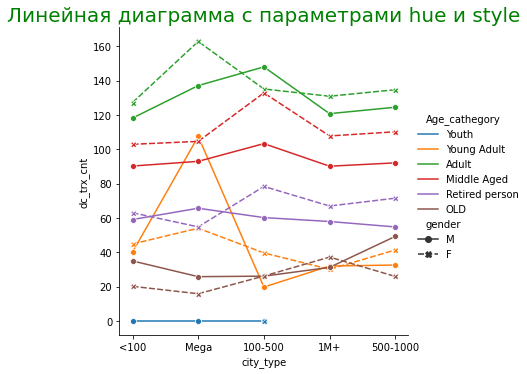

In [27]:
sns.relplot(
    x='city_type',
    y='dc_trx_cnt', 
    hue='Age_cathegory', 
    style='gender', 
    dashes=True,
    markers=True,
    data=df_copy, 
    kind='line', 
    ci=None)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');

#обычно количество трат по картам у мужчин и женщин имеют тот же тренд по видам городов, но в категории Young Adult есть
#заметные различия

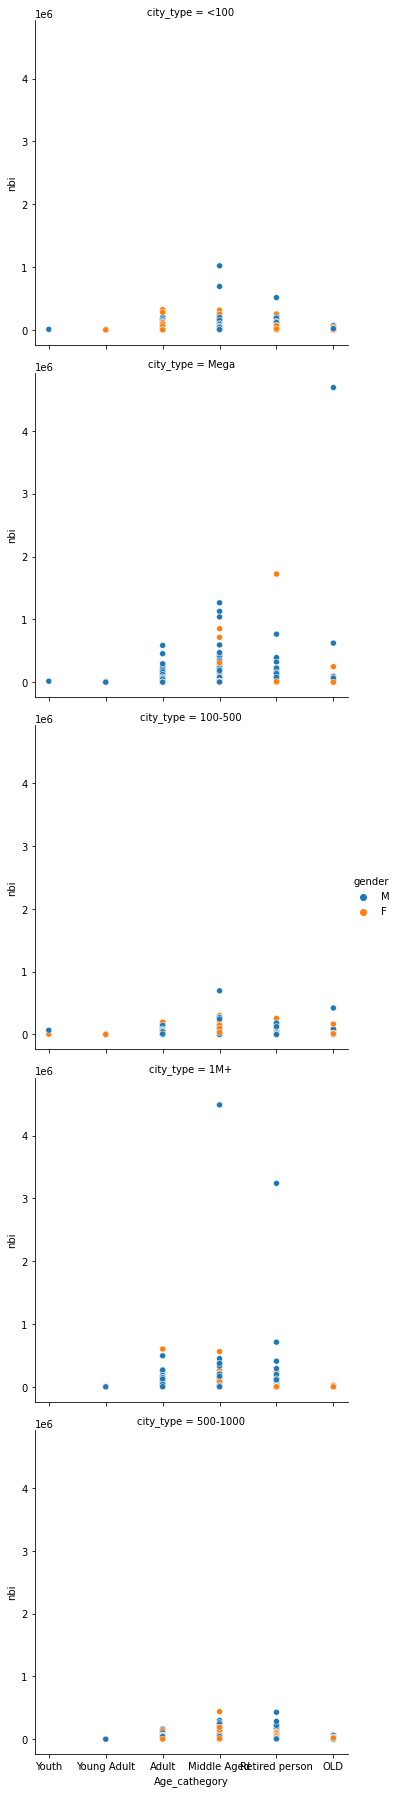

In [38]:
sns.relplot(
    x='Age_cathegory',
    y='nbi',
    hue='gender',
    row='city_type',
    data=df_copy,
#     kind='scatter'
#     kind='line'
)
#plt.title('Диаграмма рассеяния', size=20, color='g');

#доход по категориям и полу и типу города

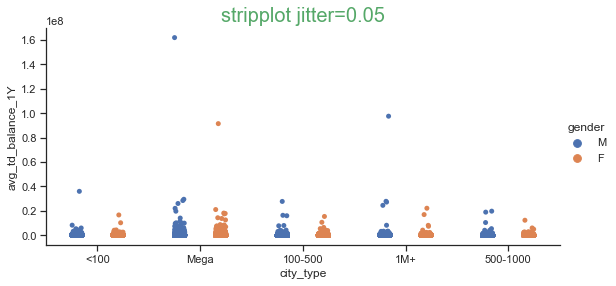

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

#day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(
    x='city_type',
    y='avg_td_balance_1Y', 
    data=df_copy, 
    hue='gender',    # оба на одном графике разными цветами
    #order=day_order, 
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True)
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('stripplot jitter=0.05', size=20, color='g');

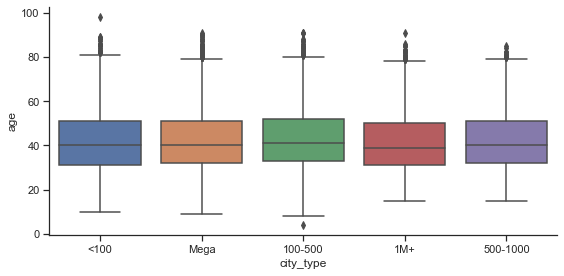

In [53]:
sns.catplot(
    x='city_type',
    y='age', 
    data=df_copy, 
    height=4, 
    aspect=2, 
    kind='box') 
 
#возраст клиентов

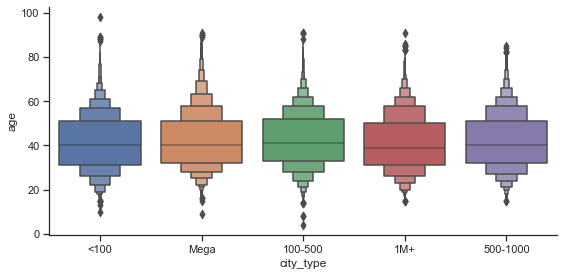

In [54]:
sns.catplot(
    x='city_type',
    y='age', 
    data=df_copy, 
    height=4, 
    aspect=2, 
    kind='boxen') 
 
#возраст клиентов

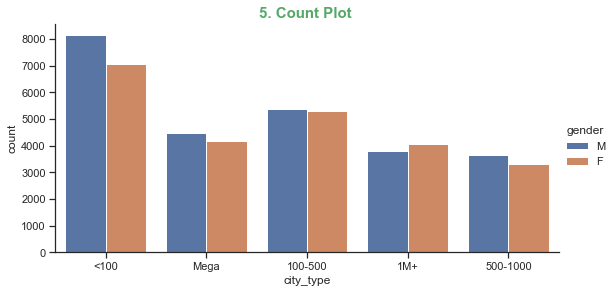

In [64]:
sns.catplot(x='city_type', 
            data=df_copy, 
            kind='count',
            hue='gender',
            height=4, 
            aspect=2
           );  # long form data frame
plt.title('5. Count Plot ', size=15, color='g', weight='bold');


#выборка по городам неравномерная

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


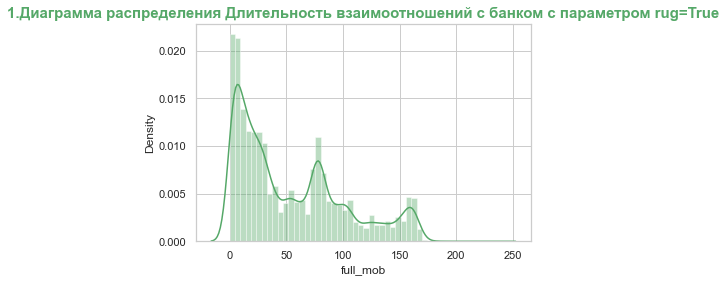

In [71]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
   df_copy.full_mob,
    color='g', 
    rug=False, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('1.Диаграмма распределения Длительность взаимоотношений с банком с параметром rug=True', size=15, color='g', weight='bold')
plt.show();